### Loading Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import pandas_profiling

### Reading Data

In [2]:
train=pd.read_csv("Stroke_Prediction_Data.csv")

In [3]:
train.columns

Index(['Seqn', 'Age', 'BMI', 'Waist(inches)', 'Weight(lbs)',
       'Total Cholestrol', 'Height(inches)', 'Sleep Hours', 'High BP',
       'High Cholestrol', 'Maritial Status', 'Race', 'Teeth Health',
       'Diabetic or Not', 'Gender', 'Heart Attack', 'Smoked Yes00 Cig in life',
       'Stroke'],
      dtype='object')

In [4]:
train.dtypes

Seqn                         int64
Age                          int64
BMI                          int64
Waist(inches)                int64
Weight(lbs)                  int64
Total Cholestrol             int64
Height(inches)               int64
Sleep Hours                  int64
High BP                     object
High Cholestrol             object
Maritial Status             object
Race                        object
Teeth Health                object
Diabetic or Not             object
Gender                      object
Heart Attack                object
Smoked Yes00 Cig in life    object
Stroke                      object
dtype: object

In [5]:
train.shape

(26340, 18)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26340 entries, 0 to 26339
Data columns (total 18 columns):
Seqn                        26340 non-null int64
Age                         26340 non-null int64
BMI                         26340 non-null int64
Waist(inches)               26340 non-null int64
Weight(lbs)                 26340 non-null int64
Total Cholestrol            26340 non-null int64
Height(inches)              26340 non-null int64
Sleep Hours                 26340 non-null int64
High BP                     26340 non-null object
High Cholestrol             26340 non-null object
Maritial Status             26340 non-null object
Race                        26340 non-null object
Teeth Health                26340 non-null object
Diabetic or Not             26340 non-null object
Gender                      26340 non-null object
Heart Attack                26340 non-null object
Smoked Yes00 Cig in life    26340 non-null object
Stroke                      26340 non-null object

In [7]:
train.describe()

,Seqn,Age,BMI,Waist(inches),Weight(lbs),Total Cholestrol,Height(inches),Sleep Hours
count,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000
mean,65265.762756,49.803303,29.086333,38.957707,179.014351,193.394989,65.666894,7.045482
std,17198.335824,17.635828,6.789491,6.209270,46.558977,40.877243,4.000339,1.447219
min,31150.000000,18.000000,13.000000,22.000000,64.000000,59.000000,48.000000,4.000000
25%,50320.500000,35.000000,24.000000,35.000000,146.000000,166.000000,63.000000,6.000000
50%,65615.000000,49.000000,28.000000,38.000000,172.000000,188.000000,66.000000,7.000000
75%,80497.250000,64.000000,32.000000,42.000000,204.000000,217.000000,69.000000,8.000000
max,93702.000000,85.000000,85.000000,70.000000,491.000000,813.000000,80.000000,11.000000


In [8]:
train.describe(include=object)

,High BP,High Cholestrol,Maritial Status,Race,Teeth Health,Diabetic or Not,Gender,Heart Attack,Smoked Yes00 Cig in life,Stroke
count,26340,26340,26340,26340,26340,26340,26340,26340,26340,26340
unique,2,2,2,5,3,3,2,2,2,2
top,No,No,Yes,Non-Hispanic White,Fair,No,F,No,No,No
freq,21408,21619,19869,11126,9352,22372,13408,25367,14486,25213


In [9]:
print(train.isna().sum())

Seqn                        0
Age                         0
BMI                         0
Waist(inches)               0
Weight(lbs)                 0
Total Cholestrol            0
Height(inches)              0
Sleep Hours                 0
High BP                     0
High Cholestrol             0
Maritial Status             0
Race                        0
Teeth Health                0
Diabetic or Not             0
Gender                      0
Heart Attack                0
Smoked Yes00 Cig in life    0
Stroke                      0
dtype: int64


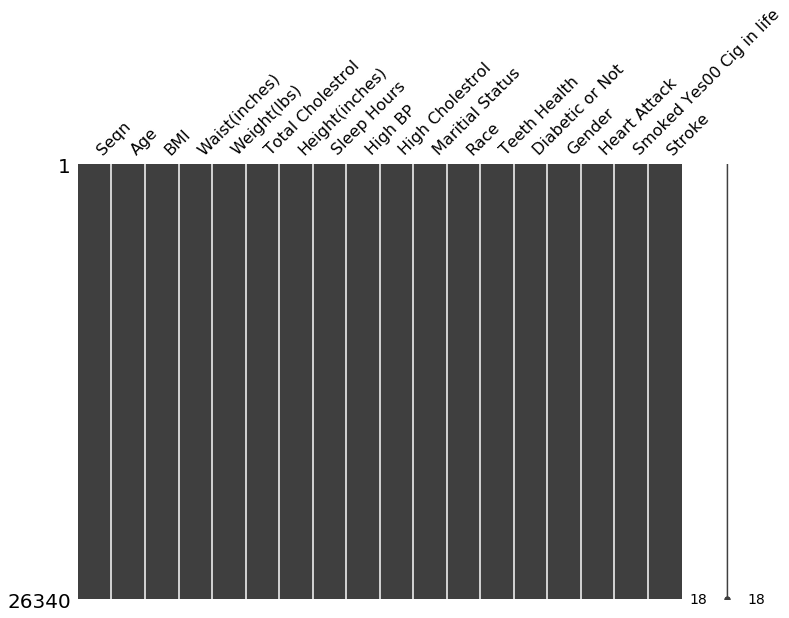

In [10]:
missingno.matrix(train,figsize=(12,8))

### Univariate Analysis of Categorical Variables

In [11]:
def visualize_plot(df,col_to_exclude,tgt_col,object_mode=True):
    n=0
    this=[]
    if object_mode:
        n_rows=2
        n_cols=5
        width=20
        height=20
    else:
        n_rows=2
        n_cols=4
        width=20
        height=20
    for column in df.columns:
        if object_mode:
            if(df[column].dtypes=='O') & (column!=col_to_exclude):
                this.append(column)
        else:
            if(df[column].dtypes!='O') & (column!=tgt_col):
                this.append(column)
                
    fig, ax= plt.subplots(n_rows,n_cols, sharex= False, sharey=False, figsize=(width,height))
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g=sns.countplot(df[this[int(n)]],ax=ax[row][col])
            else:
                g=sns.distplot(df[this[int(n)]],ax=ax[row][col])
                
            ax[row,col].set_title("Column Name: {}".format(this[int(n)]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n+=1
    plt.show();
    return

                

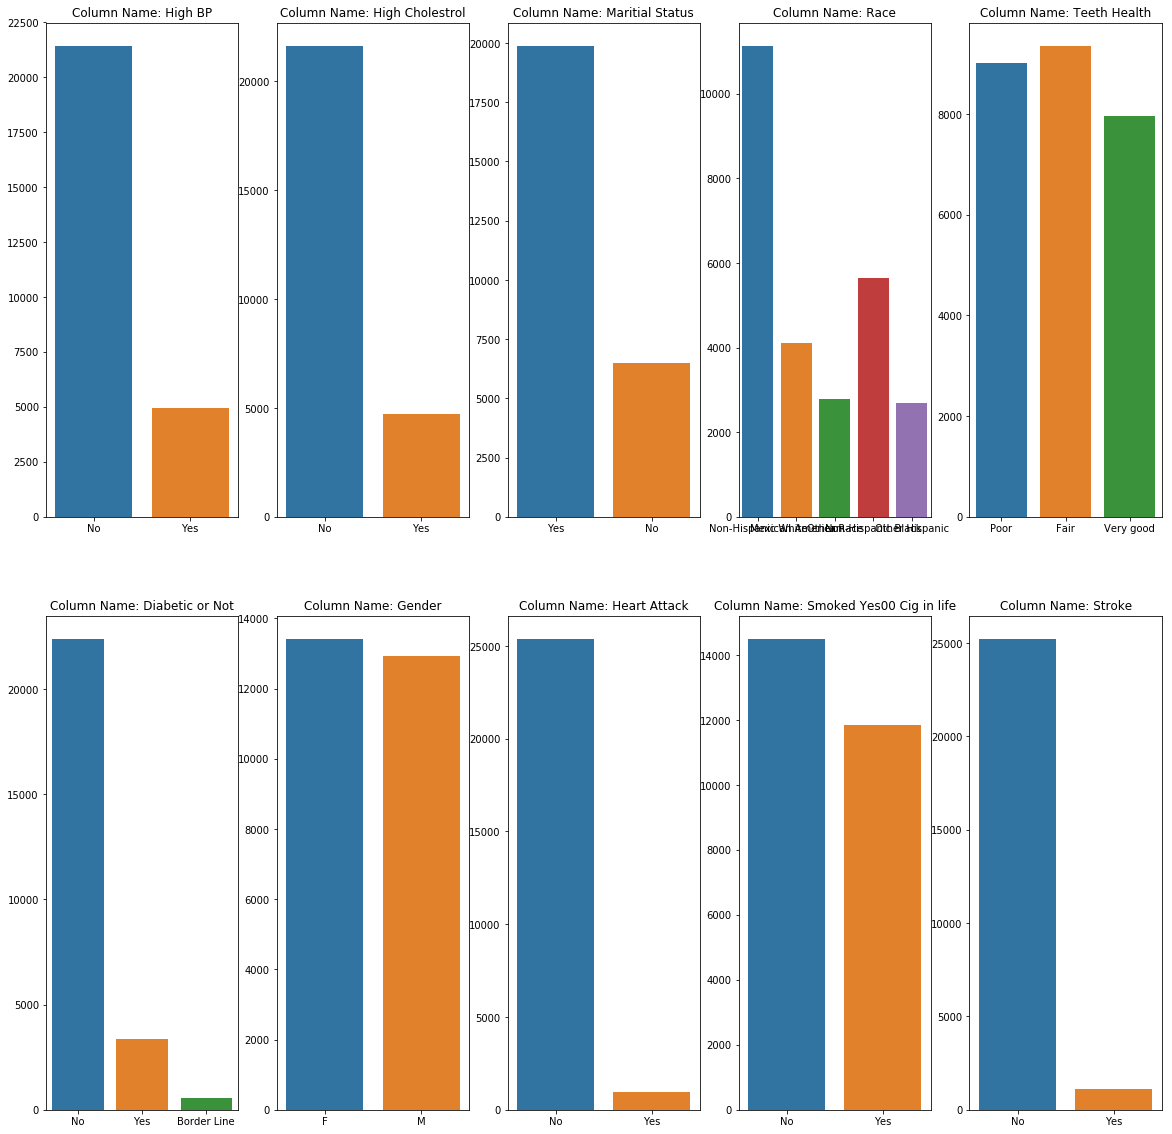

In [12]:
visualize_plot(train,'Seqn','Stroke',object_mode =True)

### Univariate Analysis of Numerical Variables

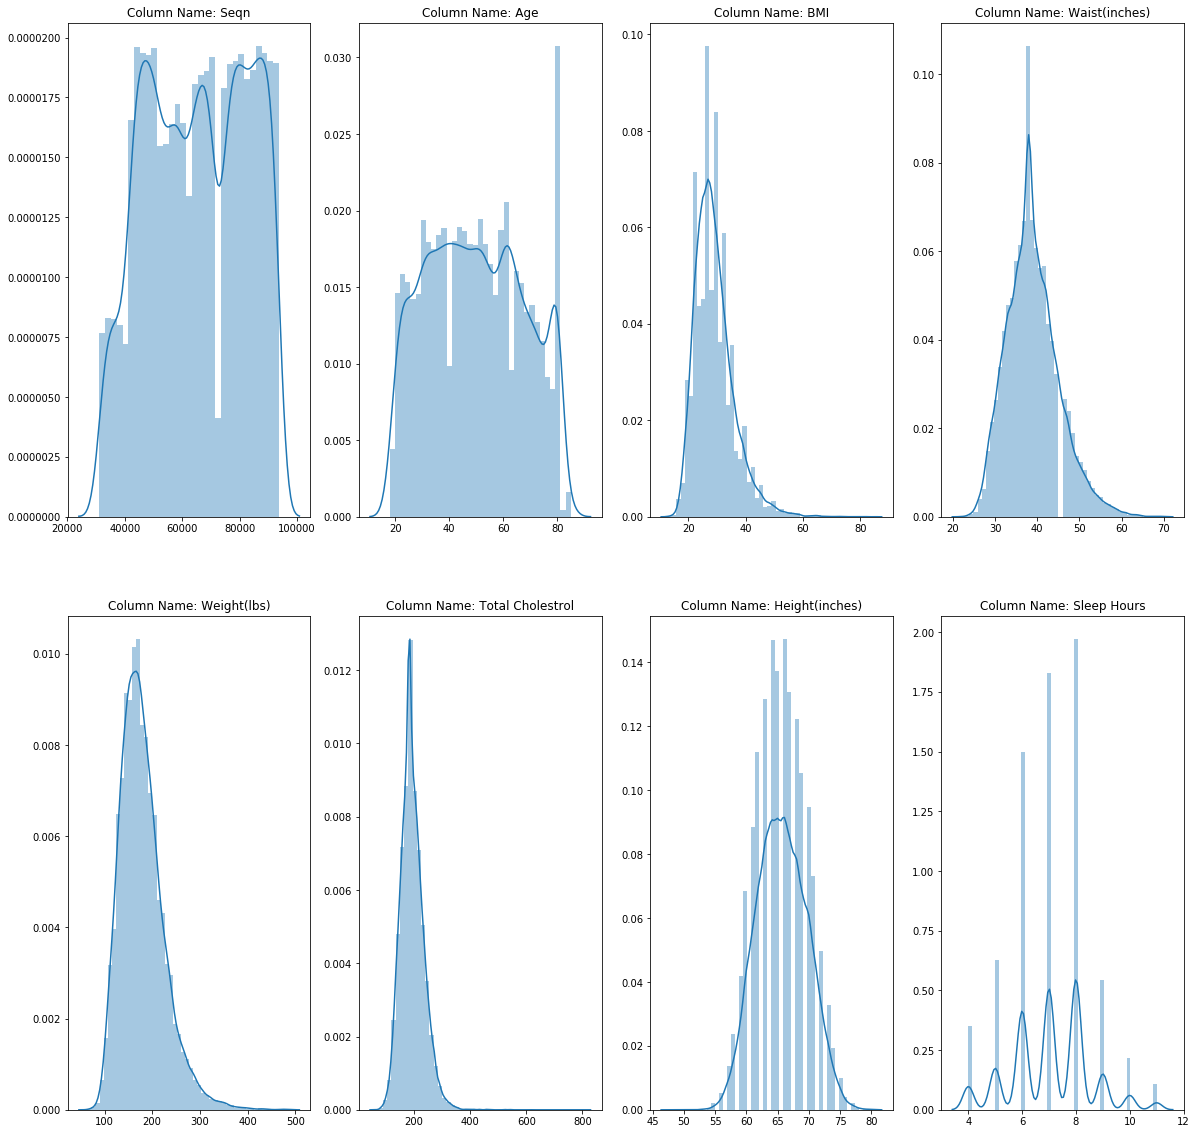

In [13]:
visualize_plot(train,'Seqn','Stroke',object_mode =False)

### Outlier Analysis

In [14]:
cont_var=['Age','BMI','Waist(inches)','Weight(lbs)','Total Cholestrol','Height(inches)']

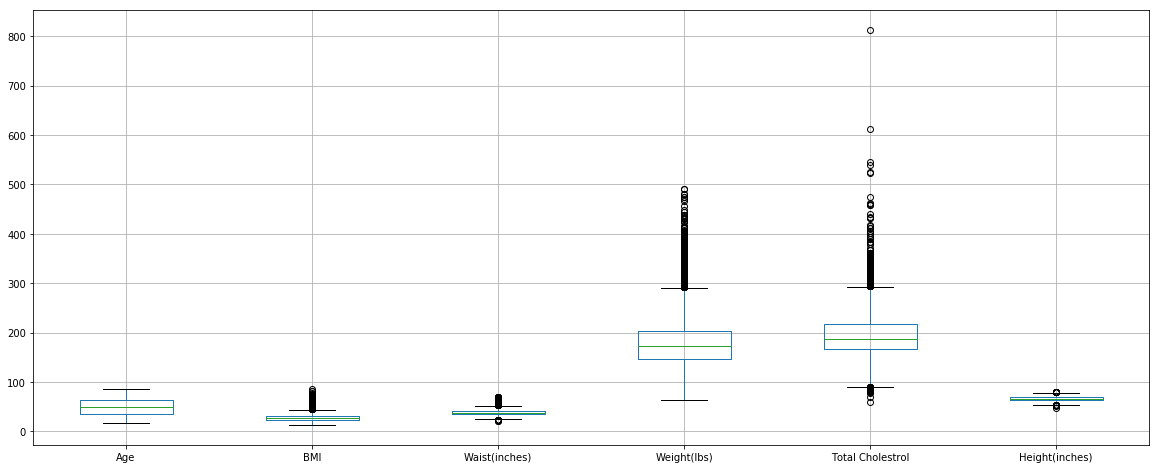

In [15]:
train[cont_var].boxplot(return_type='axes',figsize=(20,8))

### Bivariate Analysis

#### Categorical variables vs Target variable

In [16]:
def bi_variate(df,col1,col2):
    if col2=='Stroke':
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x:x/x.sum()*100, axis=1)
    else:
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x:x/x.sum()*100, axis=0)
    #
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of Stroke')
    plt.title('{} vs Stroke'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,21))
    plt.show()
    return cross_name

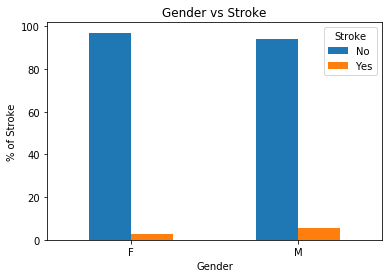

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Gender,,
F,97.076372,2.923628
M,94.316424,5.683576


In [17]:
bi_variate(train,'Gender','Stroke')

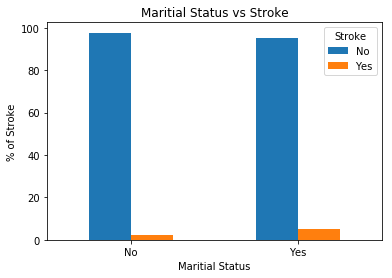

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Maritial Status,,
No,97.620151,2.379849
Yes,95.102924,4.897076


In [18]:
bi_variate(train,'Maritial Status','Stroke')

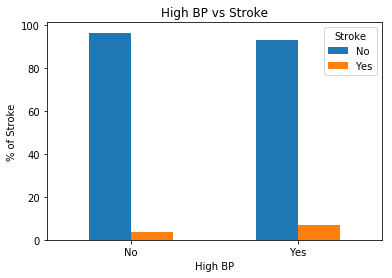

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
High BP,,
No,96.361173,3.638827
Yes,92.944039,7.055961


In [19]:
bi_variate(train,'High BP','Stroke')

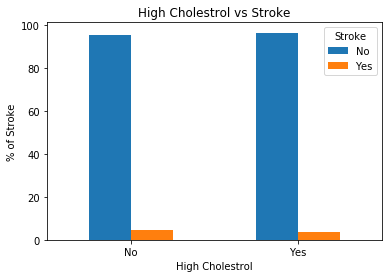

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
High Cholestrol,,
No,95.536334,4.463666
Yes,96.568524,3.431476


In [20]:
bi_variate(train,'High Cholestrol','Stroke')

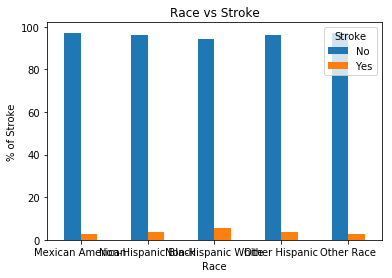

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Race,,
Mexican American,97.128255,2.871745
Non-Hispanic Black,96.293012,3.706988
Non-Hispanic White,94.364552,5.635448
Other Hispanic,96.377894,3.622106
Other Race,97.275009,2.724991


In [21]:
bi_variate(train,'Race','Stroke')

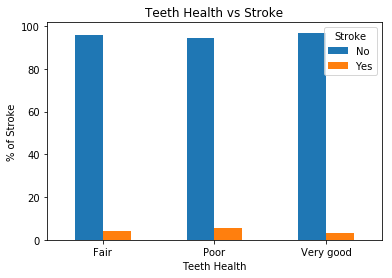

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Teeth Health,,
Fair,95.893926,4.106074
Poor,94.536185,5.463815
Very good,96.861268,3.138732


In [22]:
bi_variate(train,'Teeth Health','Stroke')

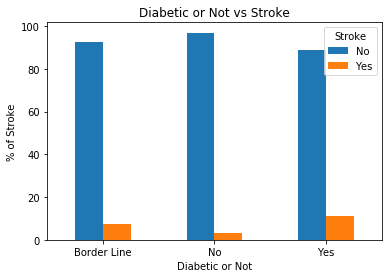

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Diabetic or Not,,
Border Line,92.465753,7.534247
No,96.862149,3.137851
Yes,88.741135,11.258865


In [23]:
bi_variate(train,'Diabetic or Not','Stroke')

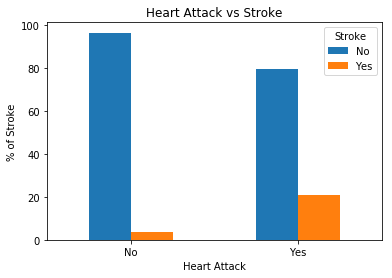

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Heart Attack,,
No,96.349588,3.650412
Yes,79.342240,20.657760


In [24]:
bi_variate(train,'Heart Attack','Stroke')

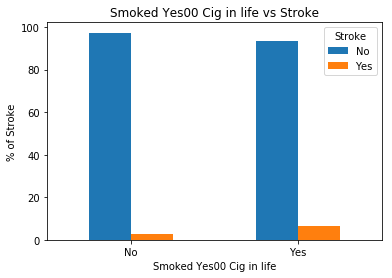

<Figure size 1152x1512 with 0 Axes>

Stroke,No,Yes
Smoked Yes00 Cig in life,,
No,97.369874,2.630126
Yes,93.706766,6.293234


In [25]:
bi_variate(train,'Smoked Yes00 Cig in life','Stroke')

#### Numerical variables

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

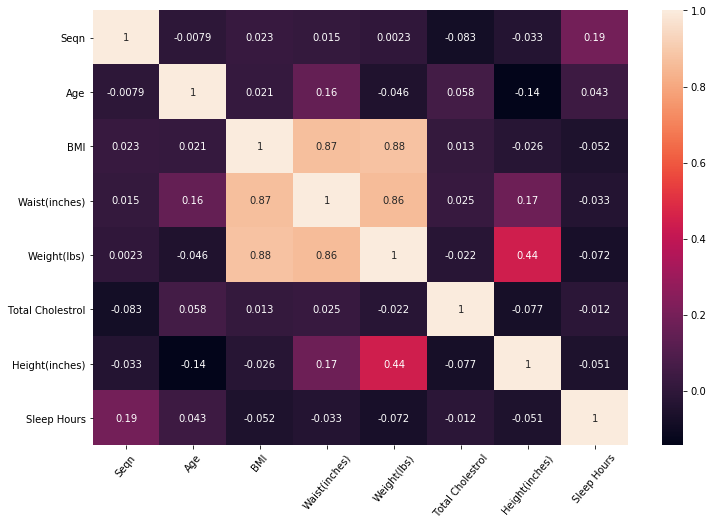

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),xticklabels=train.corr().columns.values,
           yticklabels=train.corr().columns.values,annot=True);
plt.xticks(rotation=50)

### Continous variable vs Target features

In [27]:
stroke_str={"Yes":1,"No":0}
train['Stroke']=train['Stroke'].map(stroke_str)

In [28]:
#Dataframe consisting of only continuous varialbe
train_cont=train.select_dtypes([np.int64,np.float64])

In [29]:
train_cont.head()

,Seqn,Age,BMI,Waist(inches),Weight(lbs),Total Cholestrol,Height(inches),Sleep Hours,Stroke
0,41123,85,36,47,196,222,62,6,0
1,41103,79,25,34,139,272,63,8,0
2,41101,27,22,29,121,195,62,8,0
3,41100,44,54,38,312,144,64,8,0
4,41097,43,19,28,100,175,61,8,0


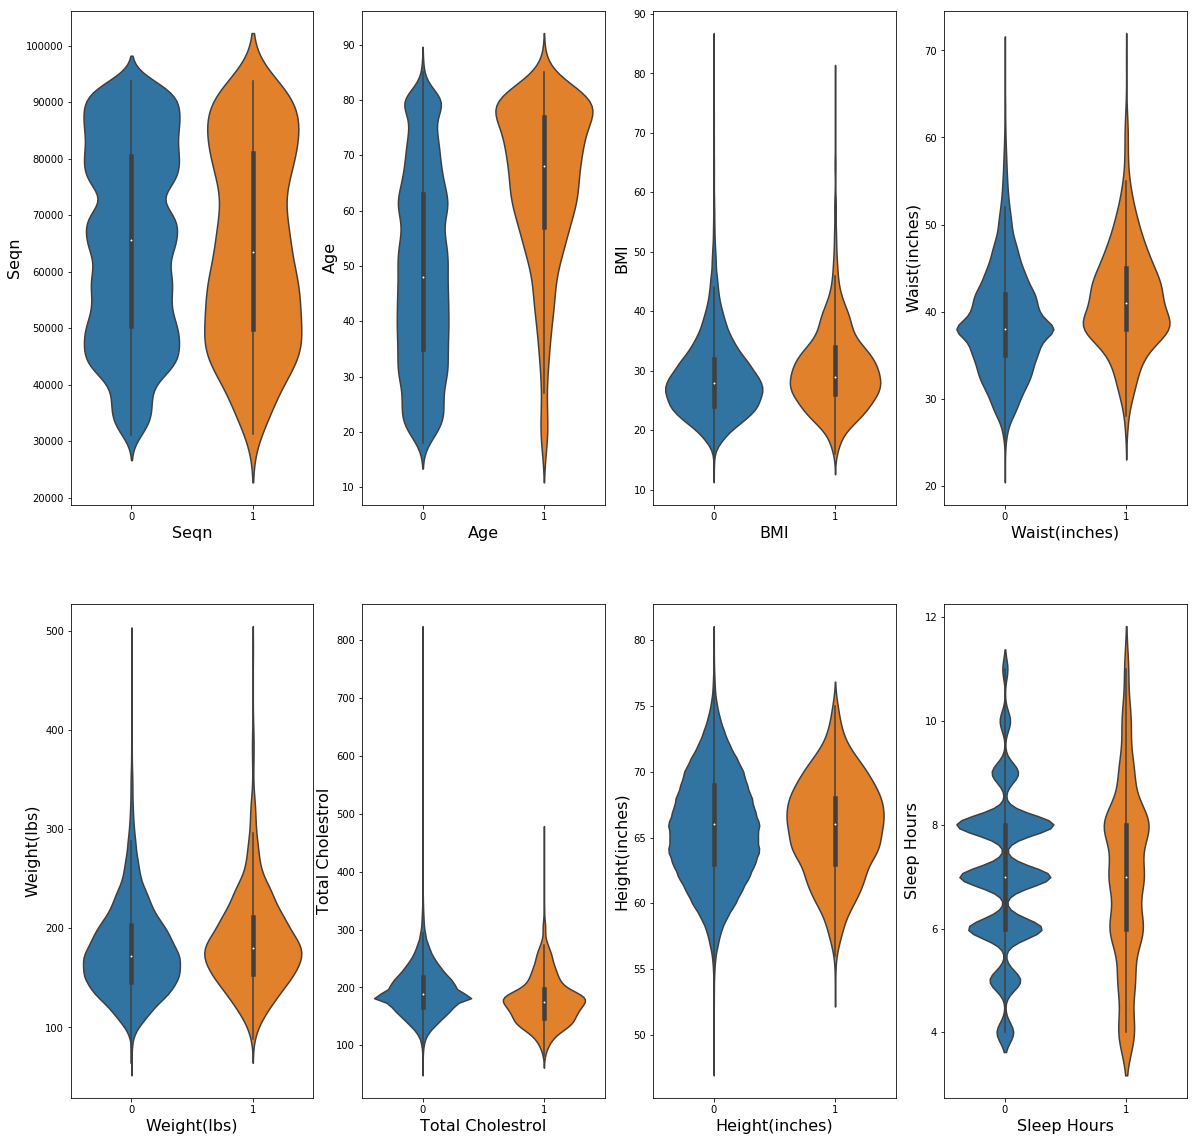

In [30]:
nrows=2
ncols=4
this=[]
n=0
for column in train_cont.columns:
    this.append(column)
fig,ax=plt.subplots(nrows,ncols,figsize=(20,20))
for row in range(nrows):
    for col in range(ncols):
        g=sns.violinplot(y=this[n],x='Stroke', data=train_cont,ax=ax[row][col])
        ax[row][col].set_xlabel(this[n],fontsize=16)
        ax[row][col].set_ylabel(this[n],fontsize=16)
        n+=1



## Model Building

In [31]:
# Drop the Loan_ID from the dataset
train=train.drop('Seqn', axis=1)

In [33]:
# Putting the target variable in another dataset
x=train.drop('Stroke',axis=1)
y=train.Stroke

In [34]:
#Creating dummy variables 
x=pd.get_dummies(x)
train=pd.get_dummies(train)

In [35]:
# dividing the train data in to train and validation for testing our model
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logit = LogisticRegression()
logit.fit(x_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
pred_cv = logit.predict(x_cv)

In [69]:
accuracy_score(y_cv,pred_cv)

0.9562136168058719

In [70]:
    #making confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)

[[7551   15]
 [ 331    5]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7566
           1       0.25      0.01      0.03       336

   micro avg       0.96      0.96      0.96      7902
   macro avg       0.60      0.51      0.50      7902
weighted avg       0.93      0.96      0.94      7902



In [72]:
## Fitting Decision Tree in the training dataset
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(x_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [73]:
pred_cv = dtc.predict(x_cv)

In [74]:
    #making confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)

[[7225  341]
 [ 294   42]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7566
           1       0.11      0.12      0.12       336

   micro avg       0.92      0.92      0.92      7902
   macro avg       0.54      0.54      0.54      7902
weighted avg       0.92      0.92      0.92      7902



In [76]:
## Fitting logistic regression in the training dataset
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
pred_cv = knn.predict(x_cv)

In [78]:
    #making confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)

[[7523   43]
 [ 329    7]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7566
           1       0.14      0.02      0.04       336

   micro avg       0.95      0.95      0.95      7902
   macro avg       0.55      0.51      0.51      7902
weighted avg       0.92      0.95      0.94      7902



In [80]:
## Fitting Naive Bayes in the training dataset
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
pred_cv = gnb.predict(x_cv)

In [82]:
    #making confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)

[[6848  718]
 [ 190  146]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7566
           1       0.17      0.43      0.24       336

   micro avg       0.89      0.89      0.89      7902
   macro avg       0.57      0.67      0.59      7902
weighted avg       0.94      0.89      0.91      7902



In [84]:
## Fitting Random Forest in the training dataset
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(x_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
pred_cv = rfc.predict(x_cv)

In [86]:
    #making confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)

[[7547   19]
 [ 333    3]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7566
           1       0.14      0.01      0.02       336

   micro avg       0.96      0.96      0.96      7902
   macro avg       0.55      0.50      0.50      7902
weighted avg       0.92      0.96      0.94      7902



## Model Performance

In [102]:
from sklearn.metrics import f1_score
def model_performance(model,x_train,x_cv,y_train,y_cv,name):
    model.fit(x_train,y_train)
    predictions=model.predict(x_cv)
    accuracy=accuracy_score(y_cv,predictions)
    #recallscore=recall_score(y_cv,predictions)
    #precision=precision_score(y_cv,predictions)
    #roc_auc=roc_auc_score(y_cv,predictions)
    f1score=f1_score(y_cv,predictions)
    df= pd.DataFrame({"Model": [name],
                     "Accuracy_score": [accuracy],
                     #"Recall_score": [recallscore],
                     #"Precision_score": [precision],
                     "F1-score": [f1score],
                     #"Area_under_curve": [roc_auc]
                     })
    return df

In [103]:
model1=model_performance(logit,x_train,x_cv,y_train,y_cv,"LogReg(Baseline)")
model2=model_performance(dtc,x_train,x_cv,y_train,y_cv,"DecisionTree")
model3=model_performance(knn,x_train,x_cv,y_train,y_cv,"KNN Classifier")
model4=model_performance(gnb,x_train,x_cv,y_train,y_cv,"Gaussian NB")
model5=model_performance(rfc,x_train,x_cv,y_train,y_cv,"RandomForestClassifier")

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
model_performances=pd.concat([model1,model2,model3,model4,model5],axis=0)

In [106]:
model_performances.head()

,Model,Accuracy_score,F1-score
0,LogReg(Baseline),0.956214,0.028090
0,DecisionTree,0.919641,0.116829
0,KNN Classifier,0.952923,0.036269
0,Gaussian NB,0.885092,0.243333
0,RandomForestClassifier,0.955454,0.016760
